## question 1:

In [141]:
def bases(num):
    print("the number " + str(num) + " in bases:")
    print("binary: " + str(bin(num)))
    print("hexadecial: " + str(hex(num)))
    print("octal: " + str(oct(num)))
    
number = input("enter a number please: ")
while (not number.isnumeric()):
    number = input("this isn't an integer. enter number please: ")
    
bases(int(number))

enter a number please: 78
the number 78 in bases:
binary: 0b1001110
hexadecial: 0x4e
octal: 0o116


# movies dataset questions:

In [2]:
import pandas as pd
cast = pd.read_csv("cast.csv", encoding='utf8')

### question 1:

In [3]:
# How many movies have the title "Hamlet"?
sumHamlet = (cast['title']=='Hamlet').sum()
print("the number of movies have the title Hamlet: " + str(sumHamlet))

the number of movies have the title Hamlet: 299


### question 2:

In [4]:
# List all of the "Treasure Island" movies from earliest to most recent.
cast.loc[cast['title'] == 'Treasure Island'].sort_values('year')

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
3280557,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN
3046750,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0
1167783,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN
1195421,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN
...,...,...,...,...,...,...
1663860,Treasure Island,1999,Victor Raider-Wexler,actor,Samowitz,10.0
1731182,Treasure Island,1999,Scot Thomas Robinson,actor,Jimmy,11.0
1813707,Treasure Island,1999,Richard Schave,actor,Man,21.0
2710458,Treasure Island,1999,Stephanie Ittleson,actress,Stella,7.0


### question 3:

In [5]:
# How many roles were credited in the silent 1921 version of Hamlet?
counter = cast.loc[cast['title'] == 'Hamlet'].loc[cast['year'] == 1921].count()['n']
print("there were " + str(counter) +" roles credited in the silent 1921 version of Hamlet")

there were 9 roles credited in the silent 1921 version of Hamlet


### question 4:

,title
year,
1910,28
1920,9
1940,25
1950,1
1960,57
1970,19
1980,3
1990,84
2000,55


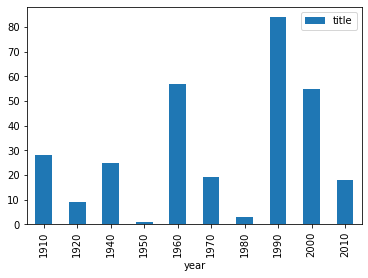

In [13]:
# Use groupby() to plot the number of "Hamlet" films made each decade
import matplotlib.pyplot as plt
decades = cast.loc[cast['title'] == 'Hamlet'].groupby((cast['year']//10)*10).count()[['title']]

decades.plot(kind="bar")
decades

### question 5:

In [138]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?
cast.loc[cast['year'] >= 1950].loc[cast['year'] < 1960].loc[cast['n'] == 1].groupby(by = ['year', 'type']).count()[['character']]

character
year type              
1950 actor          604
     actress        271
1951 actor          633
     actress        272
1952 actor          591
     actress        284
1953 actor          634
     actress        290
1954 actor          626
     actress        298
1955 actor          606
     actress        264
1956 actor          614
     actress        288
1957 actor          708
     actress        284
1958 actor          694
     actress        275
1959 actor          678
     actress        287

### question 6:

In [139]:
# List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
cast.loc[cast['year'] >= 1990].loc[cast['n'] == 1].groupby('name').count().sort_values('title', ascending=False)[['title']].head(10)

,title
name,
Mohanlal,126
Mammootty,118
Akshay Kumar,87
Jayaram,76
Andy Lau,72
Ajay Devgn,69
Amitabh Bachchan,68
Eric Roberts,68
Nagarjuna Akkineni,60


### question 7:

In [140]:
# List, in order by year, each of the films in which Frank Oz has played more than 1 role
oz = (cast.loc[cast['name'] == 'Frank Oz']).groupby(['year', 'title', 'name']).count()
oz = (oz.loc[oz['n'] > 1])
oz.iloc[:, :0]

Empty DataFrame
Columns: []
Index: [(1979, The Muppet Movie, Frank Oz), (1981, An American Werewolf in London, Frank Oz), (1981, The Great Muppet Caper, Frank Oz), (1982, The Dark Crystal, Frank Oz), (1984, The Muppets Take Manhattan, Frank Oz), (1985, Sesame Street Presents: Follow that Bird, Frank Oz), (1992, The Muppet Christmas Carol, Frank Oz), (1996, Muppet Treasure Island, Frank Oz), (1999, Muppets from Space, Frank Oz), (1999, The Adventures of Elmo in Grouchland, Frank Oz)]